In [1]:
import torch
import numpy as np
import pandas as pd
from preprocess.PreProcess import ASAP_PreProcess, TA_PreProcess, GS_PreProcess
from models import ABAE, JPAN
from trainer import JPAN_trainer
import warnings
warnings.filterwarnings("ignore")

In [2]:
data_name = 'TA' # or 'ASAP'
seed = 1
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
torch.backends.cudnn.deterministic = True
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
if data_name == 'ASAP':
    asap = ASAP_PreProcess()
    w2v_model, train_set, dev_set, test_set = asap.get_dataset()
elif data_name == 'TA':
    ta = TA_PreProcess()
    w2v_model, train_set, dev_set, test_set = ta.get_dataset()
elif data_name == 'GS':
    gs = GS_PreProcess()
    w2v_model, train_set, dev_set, test_set = gs.get_dataset()

N_vocab: 14356 | D_embed: 200 | N_aspects: 20


### Train

In [4]:
model = JPAN(w2v_model.E, w2v_model.T).to(device)
model

JPAN(
  (E): Embedding(14356, 200)
  (T): Embedding(20, 200)
  (rnn): LSTM(200, 100, num_layers=3, dropout=0.5, bidirectional=True)
  (attention): attention(
    (M): Linear(in_features=200, out_features=200, bias=True)
  )
  (linear): Linear(in_features=200, out_features=20, bias=True)
  (decoder): Linear(in_features=400, out_features=3, bias=True)
)

#### Training

In [5]:
epochs = 20
batch_size = 128
negsize = 20

trainer = JPAN_trainer(data_name=data_name)

Preparing...


23515it [01:50, 212.37it/s]


EPOCH: 1 | LOSS INFO: TOTAL:6.77297, AB: 595.53278, SC: 0.81764 | TRAIN-F1: 0.52392: 100%|█| 183/183 [00:19<00:00,  9.2
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 30.89it/s]


VAL-F1: 0.52045 | VAL-LOSS-AB: 623.27222 | VAL-LOSS-S: 0.81862
Coherence Score(10->50): [-153.3235626220703, -645.9118041992188, -1473.877197265625, -2641.81494140625, -4031.232421875]


EPOCH: 2 | LOSS INFO: TOTAL:4.43300, AB: 356.49957, SC: 0.86800 | TRAIN-F1: 0.51143: 100%|█| 183/183 [00:18<00:00,  9.7
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.66it/s]


VAL-F1: 0.52441 | VAL-LOSS-AB: 444.29345 | VAL-LOSS-S: 0.79226
Coherence Score(10->50): [-152.77035522460938, -634.85302734375, -1438.3826904296875, -2593.612060546875, -3963.534423828125]


EPOCH: 3 | LOSS INFO: TOTAL:4.33204, AB: 356.65778, SC: 0.76546 | TRAIN-F1: 0.51333: 100%|█| 183/183 [00:19<00:00,  9.5
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 32.48it/s]


VAL-F1: 0.53895 | VAL-LOSS-AB: 388.40992 | VAL-LOSS-S: 0.75547
Coherence Score(10->50): [-149.64120483398438, -636.0665893554688, -1451.5330810546875, -2591.8232421875, -3982.32568359375]


EPOCH: 4 | LOSS INFO: TOTAL:4.18874, AB: 344.34207, SC: 0.74532 | TRAIN-F1: 0.51743: 100%|█| 183/183 [00:18<00:00,  9.6
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.92it/s]


VAL-F1: 0.58444 | VAL-LOSS-AB: 364.57063 | VAL-LOSS-S: 0.75538
Coherence Score(10->50): [-150.29342651367188, -646.8076171875, -1439.8114013671875, -2594.550537109375, -3986.378173828125]


EPOCH: 5 | LOSS INFO: TOTAL:3.86113, AB: 306.32867, SC: 0.79785 | TRAIN-F1: 0.60294: 100%|█| 183/183 [00:18<00:00,  9.6
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.29it/s]


VAL-F1: 0.60552 | VAL-LOSS-AB: 356.33997 | VAL-LOSS-S: 0.74605
Coherence Score(10->50): [-153.04505920410156, -645.580078125, -1457.1944580078125, -2616.375732421875, -4005.78515625]


EPOCH: 6 | LOSS INFO: TOTAL:3.59840, AB: 287.71536, SC: 0.72125 | TRAIN-F1: 0.59375: 100%|█| 183/183 [00:19<00:00,  9.6
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 32.49it/s]


VAL-F1: 0.60043 | VAL-LOSS-AB: 350.19596 | VAL-LOSS-S: 0.72992
Coherence Score(10->50): [-152.2181854248047, -646.8997802734375, -1460.5472412109375, -2621.53955078125, -4008.23388671875]


EPOCH: 7 | LOSS INFO: TOTAL:3.72345, AB: 302.07434, SC: 0.70270 | TRAIN-F1: 0.58132: 100%|█| 183/183 [00:18<00:00,  9.6
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 32.26it/s]


VAL-F1: 0.60702 | VAL-LOSS-AB: 348.46519 | VAL-LOSS-S: 0.72670
Coherence Score(10->50): [-155.86045837402344, -655.7425537109375, -1472.43017578125, -2636.860107421875, -4027.13916015625]


EPOCH: 8 | LOSS INFO: TOTAL:3.72246, AB: 302.93237, SC: 0.69313 | TRAIN-F1: 0.65513: 100%|█| 183/183 [00:19<00:00,  9.5
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.35it/s]


VAL-F1: 0.60074 | VAL-LOSS-AB: 348.89428 | VAL-LOSS-S: 0.72427
Coherence Score(10->50): [-153.5579376220703, -650.8641357421875, -1471.123046875, -2636.3896484375, -4027.362548828125]


EPOCH: 9 | LOSS INFO: TOTAL:3.84675, AB: 315.91928, SC: 0.68755 | TRAIN-F1: 0.62069: 100%|█| 183/183 [00:19<00:00,  9.5
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.59it/s]


VAL-F1: 0.60388 | VAL-LOSS-AB: 345.86074 | VAL-LOSS-S: 0.72184
Coherence Score(10->50): [-152.32620239257812, -650.8327026367188, -1469.984375, -2635.32861328125, -4025.979736328125]


EPOCH: 10 | LOSS INFO: TOTAL:3.94413, AB: 330.68683, SC: 0.63726 | TRAIN-F1: 0.66225: 100%|█| 183/183 [00:19<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.82it/s]


VAL-F1: 0.61082 | VAL-LOSS-AB: 346.81493 | VAL-LOSS-S: 0.71908
Coherence Score(10->50): [-153.66505432128906, -650.5380859375, -1471.53759765625, -2633.03369140625, -4024.16796875]


EPOCH: 11 | LOSS INFO: TOTAL:3.71185, AB: 299.91830, SC: 0.71267 | TRAIN-F1: 0.63699: 100%|█| 183/183 [00:18<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.73it/s]


VAL-F1: 0.60945 | VAL-LOSS-AB: 346.06418 | VAL-LOSS-S: 0.71950
Coherence Score(10->50): [-153.15093994140625, -652.2408447265625, -1473.016357421875, -2634.891357421875, -4026.796142578125]


EPOCH: 12 | LOSS INFO: TOTAL:3.86699, AB: 308.95328, SC: 0.77746 | TRAIN-F1: 0.53407: 100%|█| 183/183 [00:18<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 32.71it/s]


VAL-F1: 0.61062 | VAL-LOSS-AB: 348.48417 | VAL-LOSS-S: 0.71700
Coherence Score(10->50): [-153.32290649414062, -652.5061645507812, -1473.3076171875, -2635.247314453125, -4027.330810546875]


EPOCH: 13 | LOSS INFO: TOTAL:3.99414, AB: 330.30151, SC: 0.69112 | TRAIN-F1: 0.65377: 100%|█| 183/183 [00:18<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 32.95it/s]


VAL-F1: 0.60706 | VAL-LOSS-AB: 346.49153 | VAL-LOSS-S: 0.71800
Coherence Score(10->50): [-153.2728729248047, -651.7291870117188, -1473.535888671875, -2635.63525390625, -4027.62841796875]


EPOCH: 14 | LOSS INFO: TOTAL:3.86417, AB: 314.30444, SC: 0.72112 | TRAIN-F1: 0.65436: 100%|█| 183/183 [00:18<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 32.01it/s]


VAL-F1: 0.61318 | VAL-LOSS-AB: 345.62725 | VAL-LOSS-S: 0.71932
Coherence Score(10->50): [-152.9500732421875, -650.4310913085938, -1471.6708984375, -2633.31787109375, -4024.88037109375]


EPOCH: 15 | LOSS INFO: TOTAL:3.52507, AB: 281.96066, SC: 0.70547 | TRAIN-F1: 0.63690: 100%|█| 183/183 [00:19<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.88it/s]


VAL-F1: 0.61106 | VAL-LOSS-AB: 346.02052 | VAL-LOSS-S: 0.71917
Coherence Score(10->50): [-154.42906188964844, -650.2784423828125, -1472.7669677734375, -2632.885009765625, -4024.44775390625]


EPOCH: 16 | LOSS INFO: TOTAL:3.72259, AB: 311.08948, SC: 0.61170 | TRAIN-F1: 0.70899: 100%|█| 183/183 [00:19<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.82it/s]


VAL-F1: 0.60866 | VAL-LOSS-AB: 351.01482 | VAL-LOSS-S: 0.71996
Coherence Score(10->50): [-154.65419006347656, -650.268310546875, -1471.482666015625, -2633.129150390625, -4024.69189453125]


EPOCH: 17 | LOSS INFO: TOTAL:3.74060, AB: 305.02859, SC: 0.69032 | TRAIN-F1: 0.63358: 100%|█| 183/183 [00:19<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 32.30it/s]


VAL-F1: 0.61239 | VAL-LOSS-AB: 344.20331 | VAL-LOSS-S: 0.71763
Coherence Score(10->50): [-154.65419006347656, -650.3872680664062, -1472.908447265625, -2633.12255859375, -4024.68505859375]


EPOCH: 18 | LOSS INFO: TOTAL:3.47622, AB: 274.83325, SC: 0.72788 | TRAIN-F1: 0.60106: 100%|█| 183/183 [00:18<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.15it/s]


VAL-F1: 0.60949 | VAL-LOSS-AB: 348.61705 | VAL-LOSS-S: 0.71926
Coherence Score(10->50): [-154.65419006347656, -650.5985107421875, -1472.997314453125, -2633.38525390625, -4024.947998046875]


EPOCH: 19 | LOSS INFO: TOTAL:3.65848, AB: 287.93912, SC: 0.77909 | TRAIN-F1: 0.58760: 100%|█| 183/183 [00:18<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.43it/s]


VAL-F1: 0.61005 | VAL-LOSS-AB: 346.83305 | VAL-LOSS-S: 0.71665
Coherence Score(10->50): [-154.68191528320312, -650.626220703125, -1473.0250244140625, -2633.4130859375, -4024.975830078125]


EPOCH: 20 | LOSS INFO: TOTAL:3.66448, AB: 290.29333, SC: 0.76155 | TRAIN-F1: 0.57093: 100%|█| 183/183 [00:18<00:00,  9.
validating: 100%|██████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 31.23it/s]


VAL-F1: 0.60816 | VAL-LOSS-AB: 348.72983 | VAL-LOSS-S: 0.71677
Coherence Score(10->50): [-154.6894989013672, -650.8326416015625, -1471.60693359375, -2633.42919921875, -4024.9921875]


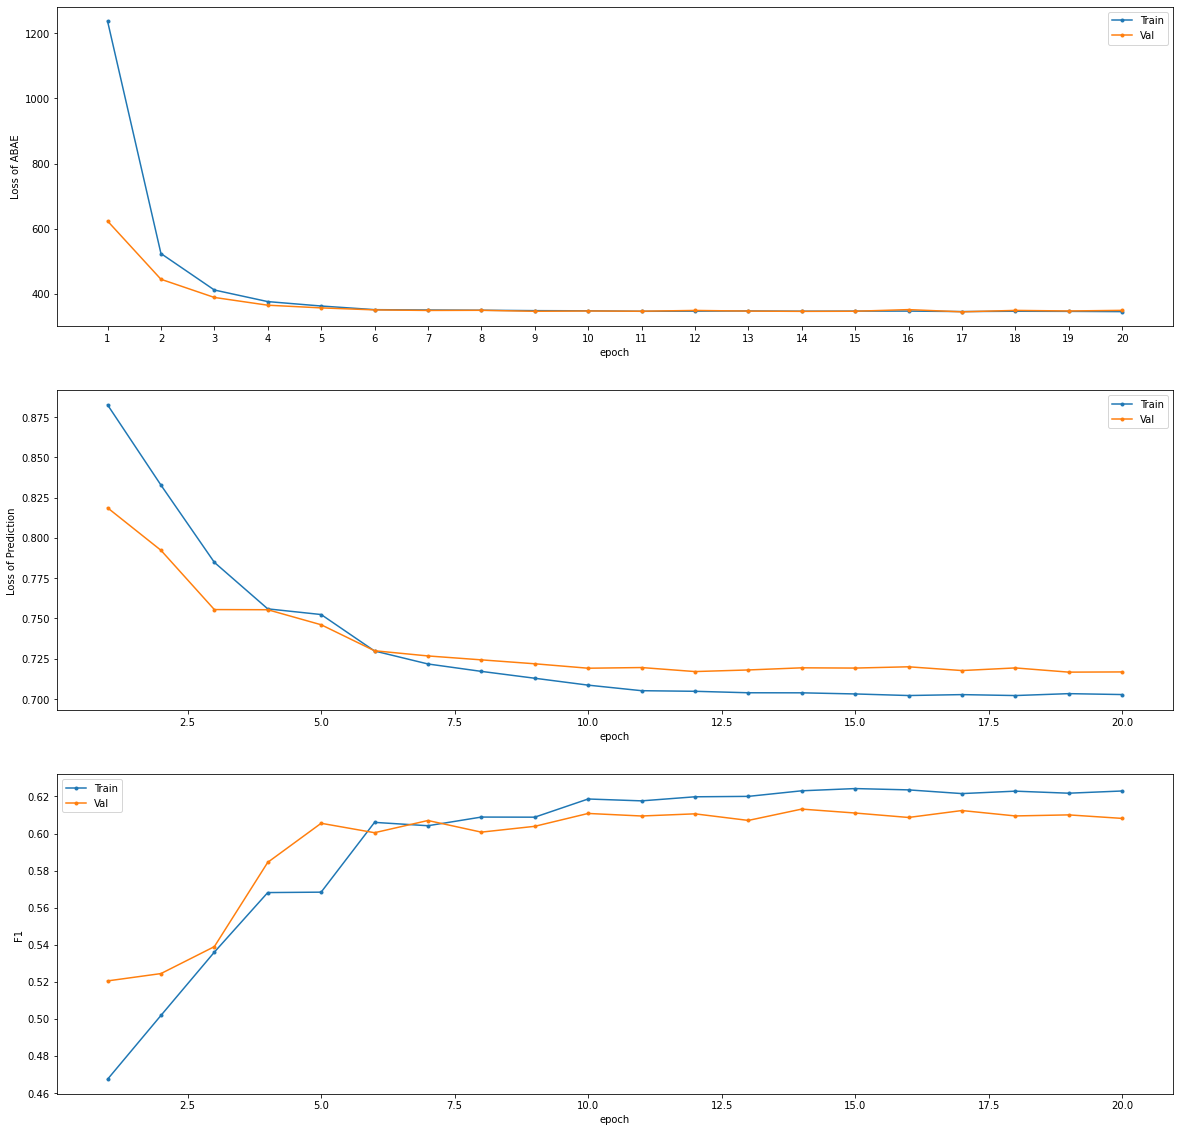

In [6]:
trainer.train(model, w2v_model, train_set, dev_set, device=device, epochs=epochs, batch_size=batch_size, negsize=negsize, 
              ortho_reg=0.1, data_name=data_name, model_name='JPAN_test_' + str(seed))

#### Testing

In [7]:
model = JPAN(w2v_model.E, w2v_model.T).to(device)
model.load_state_dict(torch.load("./model_params/" + data_name + "_JPAN_test_"+ str(seed) +"_8.model", map_location=device))
model.eval()

JPAN(
  (E): Embedding(14356, 200)
  (T): Embedding(20, 200)
  (rnn): LSTM(200, 100, num_layers=3, dropout=0.5, bidirectional=True)
  (W2): Linear(
    (linear): Linear(in_features=400, out_features=200, bias=True)
  )
  (fc): Linear(
    (linear): Linear(in_features=200, out_features=3, bias=True)
  )
  (attention): attention(
    (M): Linear(in_features=200, out_features=200, bias=True)
  )
  (linear): Linear(in_features=200, out_features=20, bias=True)
  (gru): GRU(200, 100, num_layers=3, dropout=0.5, bidirectional=True)
  (gru_decoder): Linear(in_features=200, out_features=3, bias=True)
)

review-level sentiment classification

In [8]:
trainer.test_review_level_SC(model, test_set, batch_size, device)

Precision: 0.6793699092512395
Recall: 0.6714422132307266
F1-score: 0.6686985093775927
Accuracy: 0.7258522727272727


aspect identification

In [8]:
trainer.test_ACD(model, test_set, batch_size, device)

Th: 0.01000 | P: 0.56696 | R: 0.79874 | F1: 0.663185379
Th: 0.01184 | P: 0.56696 | R: 0.79874 | F1: 0.663185379
Th: 0.01367 | P: 0.56696 | R: 0.79874 | F1: 0.663185379
Th: 0.01551 | P: 0.56696 | R: 0.79874 | F1: 0.663185379
Th: 0.01735 | P: 0.56696 | R: 0.79874 | F1: 0.663185379
Th: 0.01918 | P: 0.56551 | R: 0.79403 | F1: 0.660562459
Th: 0.02102 | P: 0.56502 | R: 0.79245 | F1: 0.659685864
Th: 0.02286 | P: 0.56257 | R: 0.78459 | F1: 0.655285620
Th: 0.02469 | P: 0.55809 | R: 0.77044 | F1: 0.647291942
Th: 0.02653 | P: 0.55376 | R: 0.75314 | F1: 0.638241173
Th: 0.02837 | P: 0.54599 | R: 0.72799 | F1: 0.623989218
Th: 0.03020 | P: 0.53576 | R: 0.69497 | F1: 0.605065024
Th: 0.03204 | P: 0.52434 | R: 0.66038 | F1: 0.584551148
Th: 0.03388 | P: 0.51558 | R: 0.62421 | F1: 0.564722617
Th: 0.03571 | P: 0.51026 | R: 0.58648 | F1: 0.545720556
Th: 0.03755 | P: 0.50292 | R: 0.54245 | F1: 0.521936460
Th: 0.03939 | P: 0.49383 | R: 0.50314 | F1: 0.498442368
Th: 0.04122 | P: 0.48590 | R: 0.46069 | F1: 0.47

ACSA

In [7]:
trainer.test_ACSA(model, test_set, batch_size, device, best_th=0.01735)

('Bullying policy', -1)
('Academics', -1)
('Bullying policy', -1)
('Character', -1)
('Bullying policy', -1)
('Character', -1)
('LD Support', -1)
('Character', -1)
('Teachers', -1)
('Leadership', -1)
('Programs', -1)
('Leadership', -1)
('Teachers', -1)
('LD support', -1)


IndexError: list index out of range

For analysis and error analysis

In [8]:
y, r_senti, ac_gold, ac_pred, w_senti, word_att, p_t, flag1, flag2 = trainer.output_attention(model, test_set, device, best_th=0.01551)

4459
4459
3073
4099


In [22]:
# AC right + review-level right
a = []
for i in range(len(flag1)):
    if flag1[i] == flag2[i] == 1:
        print(i)
        a.append(i)

0
2
6
7
8
10
11
14
15
16
19
21
22
23
25
27
29
31
35
36
38
39
40
41
44
46
47
48
50
51
52
53
54
55
56
57
58
61
63
64
65
67
69
70
71
72
75
76
77
78
79
80
81
82
83
85
87
88
91
92
93
94
95
96
98
99
101
102
103
104
105
106
109
110
111
112
113
114
117
119
120
121
124
126
127
128
129
130
131
132
134
138
139
142
144
145
146
147
151
152
153
154
156
157
158
159
160
161
162
166
167
168
169
171
172
173
174
175
177
178
184
185
186
187
188
189
190
191
193
194
196
197
198
199
200
203
210
211
212
213
214
215
216
217
218
220
224
225
226
227
228
230
231
232
233
235
236
237
240
242
243
245
248
249
251
252
253
255
256
257
258
259
262
263
264
265
266
267
270
271
272
273
274
276
277
280
281
282
283
284
286
287
288
289
292
293
294
296
297
298
299
300
301
302
304
305
307
308
309
310
311
313
314
315
316
317
318
320
322
323
324
325
327
330
331
332
334
336
341
342
343
344
348
349
351
352
353
354
355
356
357
359
361
362
363
364
365
366
368
370
371
372
373
376
377
379
382
383
384
385
386
389
390
393
394
395
396
397

In [30]:
# AC right + review-level wrong
a = []
for i in range(len(flag1)):
    if flag1[i]==1 and flag1[i]!=flag2[i]:
        print(i)
        a.append(i)

62
321
469
825
860
1108
1334
1688
1762
2315
2768
2849
3127
3235
3254
3380
4079


In [31]:
for i in a:
    # num of sentiment polarities
    if len(set([j[1] for j in ac_gold[i]])) > 1:
        print(i)
    
#     if len(ac_gold[i]) == 4:
#         print(i)

In [ ]:
for i in range(len(flag1)):
    if len(set([j[1] for j in ac_gold[i]])) > 1:
        print(i)

In [39]:
ind = 140
ac_gold[ind], ac_pred[ind]

([('Academics', 0),
  ('Bullying policy', 0),
  ('Character', 1),
  ('Programs', 0),
  ('LD support', 1)],
 [('Academics', 1),
  ('Bullying policy', 1),
  ('Character', 1),
  ('Programs', 1),
  ('LD support', 1)])

In [35]:
y[ind], r_senti[ind]

(tensor(1, device='cuda:0'),
 tensor([ 2.8179, -0.2445, -2.3153], device='cuda:0'))

In [36]:
w_senti.argmax(dim=-1)[ind]

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0], device='cuda:0')

In [16]:
torch.softmax(r_senti[ind], dim=-1)

tensor([0.0697, 0.4337, 0.4966], device='cuda:0')

In [13]:
cluster_map = {0: 'stuff', 1: 'value', 2: 'room', 3: 'clean', 4: 'location', 5: 'service',
                6: 'service', 7: 'room', 8: 'location', 9: 'None', 10: 'service', 11: 'room',
                12: 'location', 13: 'service', 14: 'value', 15: 'business', 16: 'None', 17: 'location',
                18: 'service', 19: 'None'}
dic = {'value': 0, 'room': 0, 'location': 0, 'clean': 0, 'stuff': 0, 'service': 0, 'business': 0, 'None': 0}
asp_imp = p_t[ind]

for i in range(len(asp_imp)):
    if asp_imp[i] > dic[cluster_map[i]]:
        dic[cluster_map[i]] = asp_imp[i]
dic.pop('None')
r = {k: v for k, v in dic.items() if v >= 0.02}
r

{'value': tensor(0.0875, device='cuda:0'),
 'room': tensor(0.0507, device='cuda:0'),
 'location': tensor(0.0639, device='cuda:0'),
 'clean': tensor(0.0481, device='cuda:0'),
 'stuff': tensor(0.0448, device='cuda:0'),
 'service': tensor(0.0694, device='cuda:0'),
 'business': tensor(0.0488, device='cuda:0')}

In [15]:
torch.softmax(torch.tensor([0.875, 0.507, 0.694, 0.639, 0.448]), dim=-1)

tensor([0.2520, 0.1744, 0.2102, 0.1990, 0.1644])

In [ ]:
word_att[ind]

In [18]:
p_t[ind]

tensor([0.0415, 0.0594, 0.0683, 0.0475, 0.0380, 0.0440, 0.0454, 0.0808, 0.0461,
        0.0466, 0.0348, 0.0698, 0.0463, 0.0404, 0.0497, 0.0473, 0.0452, 0.0514,
        0.0563, 0.0412], device='cuda:0')